In [20]:
import rasterio
import numpy as np
import os

# Directorios de entrada y salida
input_dir = '/home/cornelius/Documentos/Glaciar_dataset_C2_L1/Analisis_temporal/USGS/Recortar_patchs_L8/2024/pred_img/'  # Carpeta donde se encuentran las imágenes
output_dir = '/home/cornelius/Documentos/Glaciar_dataset_C2_L1/Analisis_temporal/USGS/Recortar_patchs_L8/Analisis_512x512_image/'  # Carpeta donde se guardará la imagen ensamblada

# Archivos de las imágenes en orden
filenames = [
    'pred_image_0.TIF',  # Arriba izquierda
    'pred_image_1.TIF',  # Arriba derecha
    'pred_image_2.TIF',  # Abajo izquierda
    'pred_image_3.TIF'   # Abajo derecha
]

# Leer las imágenes desde la carpeta de entrada
img_0 = rasterio.open(os.path.join(input_dir, filenames[0])).read(1)
img_1 = rasterio.open(os.path.join(input_dir, filenames[1])).read(1)
img_2 = rasterio.open(os.path.join(input_dir, filenames[2])).read(1)
img_3 = rasterio.open(os.path.join(input_dir, filenames[3])).read(1)

# Crear una matriz vacía de 512x512
image_full = np.zeros((512, 512), dtype=img_0.dtype)

# Colocar las imágenes en sus posiciones correspondientes
image_full[0:256, 0:256] = img_0  # Arriba izquierda
image_full[0:256, 256:512] = img_1  # Arriba derecha
image_full[256:512, 0:256] = img_2  # Abajo izquierda
image_full[256:512, 256:512] = img_3  # Abajo derecha

# Guardar la imagen ensamblada en la carpeta de salida
output_path = os.path.join(output_dir, 'reconstructed_512x512_2024_image.TIF')
with rasterio.open(output_path, 'w', 
                   driver='GTiff', 
                   height=image_full.shape[0], 
                   width=image_full.shape[1], 
                   count=1, 
                   dtype=image_full.dtype) as dst:
    dst.write(image_full, 1)

print(f'Imagen ensamblada guardada en: {output_path}')


Imagen ensamblada guardada en: /home/cornelius/Documentos/Glaciar_dataset_C2_L1/Analisis_temporal/USGS/Recortar_patchs_L8/Analisis_512x512_image/reconstructed_512x512_2024_image.TIF


Analisis para L5

In [29]:
import rasterio
import numpy as np
import os

# Directorios de entrada y salida
input_dir = '/home/cornelius/Documentos/Glaciar_dataset_C2_L1/Analisis_temporal/USGS/Recortar_patchs_L5/2010/pred_img/'  # Carpeta donde se encuentran las imágenes
output_dir = '/home/cornelius/Documentos/Glaciar_dataset_C2_L1/Analisis_temporal/USGS/Recortar_patchs_L5/Analisis_512x512_image/'  # Carpeta donde se guardará la imagen ensamblada

# Archivos de las imágenes en orden
filenames = [
    'pred_image_0.TIF',  # Arriba izquierda
    'pred_image_1.TIF',  # Arriba derecha
    'pred_image_2.TIF',  # Abajo izquierda
    'pred_image_3.TIF'   # Abajo derecha
]

# Leer las imágenes desde la carpeta de entrada
img_0 = rasterio.open(os.path.join(input_dir, filenames[0])).read(1)
img_1 = rasterio.open(os.path.join(input_dir, filenames[1])).read(1)
img_2 = rasterio.open(os.path.join(input_dir, filenames[2])).read(1)
img_3 = rasterio.open(os.path.join(input_dir, filenames[3])).read(1)

# Crear una matriz vacía de 512x512
image_full = np.zeros((512, 512), dtype=img_0.dtype)

# Colocar las imágenes en sus posiciones correspondientes
image_full[0:256, 0:256] = img_0  # Arriba izquierda
image_full[0:256, 256:512] = img_1  # Arriba derecha
image_full[256:512, 0:256] = img_2  # Abajo izquierda
image_full[256:512, 256:512] = img_3  # Abajo derecha

# Guardar la imagen ensamblada en la carpeta de salida
output_path = os.path.join(output_dir, 'reconstructed_512x512_2010_image.TIF')
with rasterio.open(output_path, 'w', 
                   driver='GTiff', 
                   height=image_full.shape[0], 
                   width=image_full.shape[1], 
                   count=1, 
                   dtype=image_full.dtype) as dst:
    dst.write(image_full, 1)

print(f'Imagen ensamblada guardada en: {output_path}')

Imagen ensamblada guardada en: /home/cornelius/Documentos/Glaciar_dataset_C2_L1/Analisis_temporal/USGS/Recortar_patchs_L5/Analisis_512x512_image/reconstructed_512x512_2010_image.TIF


/home/cornelius/miniconda3/envs/pytorch_watnet/lib/python3.11/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
/tmp/ipykernel_23273/849543289.py:40: UserWarning: The following kwargs were not used by contour: 'label'
  linea1 = plt.contour(bordes_pred1, colors='red', linewidths=0.5, label='Predicción 1')
/tmp/ipykernel_23273/849543289.py:41: UserWarning: The following kwargs were not used by contour: 'label'
  linea2 = plt.contour(bordes_pred2, colors='blue', linewidths=0.5, label='Predicción 2')
/tmp/ipykernel_23273/849543289.py:44: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  plt.legend([linea1.collections[0], linea2.collections[0]], ['2013', '2020'], loc='lower right')


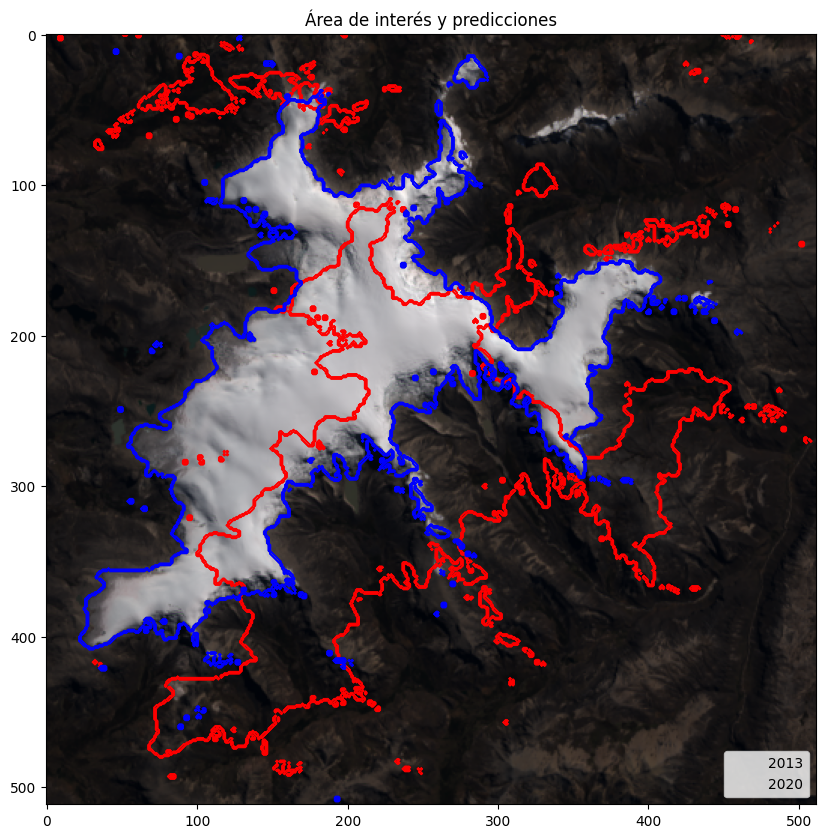

In [12]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Función para cargar una imagen multiespectral y devolver la imagen RGB
def cargar_rgb(image_path):
    with rasterio.open(image_path) as src:
        # Seleccionamos las bandas de Red, Green y Blue (depende del orden de tus bandas)
        red = src.read(3)
        green = src.read(2)
        blue = src.read(1)
        
        # Normalizar para escalar los valores entre 0 y 255 (si es necesario)
        rgb = np.stack((red, green, blue), axis=-1)
        rgb = (rgb - np.min(rgb)) / (np.max(rgb) - np.min(rgb)) * 255
        return rgb.astype(np.uint8)

# Función para cargar y detectar bordes en una imagen binaria
def detectar_bordes(image_path):
    with rasterio.open(image_path) as src:
        mask = src.read(1)  # Cargar la imagen binaria (única banda)
        
        # Detectar bordes utilizando el algoritmo de Canny
        bordes = cv2.Canny((mask * 255).astype(np.uint8), 100, 200)
        return bordes

# Cargar la imagen RGB
imagen_rgb = cargar_rgb('/home/cornelius/Documentos/Glaciar_dataset_C2_L1/Analisis_temporal/USGS/Recortar_patchs_L8/Analisis_512x512_image/LC08_L1TP_003070_20240821_20240830_02_T1.TIF')

# Cargar y detectar bordes de las imágenes binarias de predicción
bordes_pred1 = detectar_bordes('/home/cornelius/Documentos/Glaciar_dataset_C2_L1/Analisis_temporal/USGS/Recortar_patchs_L8/Pruebas_Canny/predit1.TIF')
bordes_pred2 = detectar_bordes('/home/cornelius/Documentos/Glaciar_dataset_C2_L1/Analisis_temporal/USGS/Recortar_patchs_L8/Pruebas_Canny/predit2.TIF')

# Dibujar la imagen RGB con los bordes superpuestos
plt.figure(figsize=(10, 10))
plt.imshow(imagen_rgb)

# Superponer los bordes de las predicciones con diferentes colores
linea1 = plt.contour(bordes_pred1, colors='red', linewidths=0.5, label='Predicción 1')
linea2 = plt.contour(bordes_pred2, colors='blue', linewidths=0.5, label='Predicción 2')

# Agregar la leyenda en la parte inferior derecha
plt.legend([linea1.collections[0], linea2.collections[0]], ['2013', '2020'], loc='lower right')

# Mostrar la imagen con los bordes
plt.title('Área de interés y predicciones')
#plt.legend()
plt.show()


Anaisis paara L8

/home/cornelius/miniconda3/envs/pytorch_watnet/lib/python3.11/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
/tmp/ipykernel_23273/1887808819.py:51: UserWarning: The following kwargs were not used by contour: 'label'
  linea1 = plt.contour(bordes_pred1, colors='red', linewidths=0.5, label='2015')  # Línea roja para el 2013
/tmp/ipykernel_23273/1887808819.py:52: UserWarning: The following kwargs were not used by contour: 'label'
  linea2 = plt.contour(bordes_pred2, colors='blue', linewidths=0.5, label='2020')  # Línea azul para el 2020
/tmp/ipykernel_23273/1887808819.py:53: UserWarning: The following kwargs were not used by contour: 'label'
  linea3 = plt.contour(bordes_pred3, colors='green', linewidths=0.5, label='2024')  # Línea green para el 2020


Área desde 2015 hasta 2024: ------>  41634900 39002400 35518500


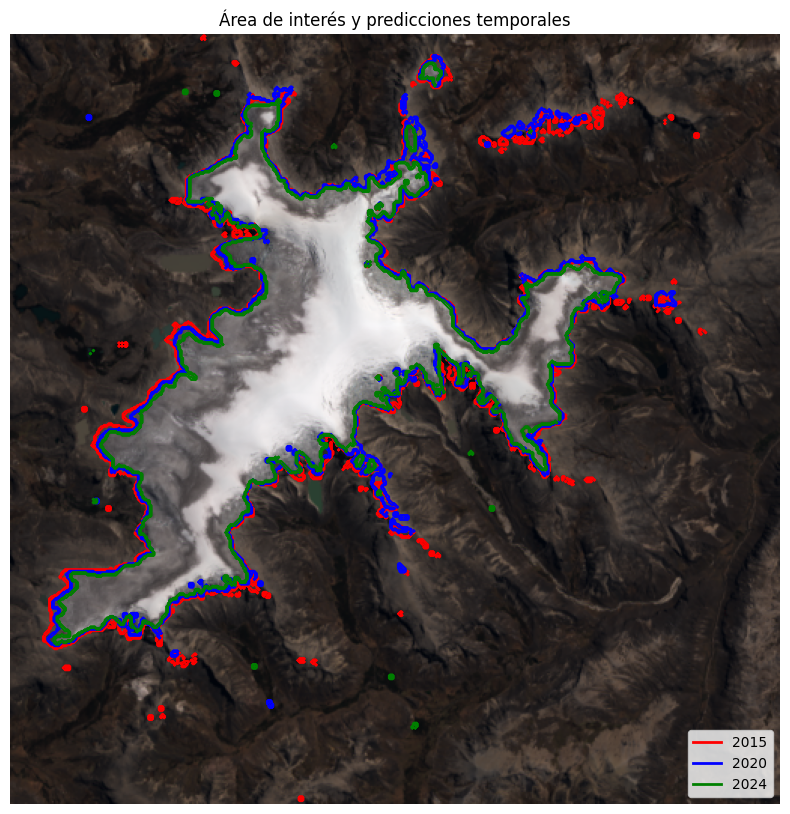

In [24]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
import cv2

#def calcular_area_imagen(imagen_path,resolucion_pixel):


# Función para cargar una imagen multiespectral y devolver la imagen RGB
def cargar_rgb(image_path):
    with rasterio.open(image_path) as src:
        # Seleccionamos las bandas de Red, Green y Blue (depende del orden de tus bandas)
        red = src.read(3)
        green = src.read(2)
        blue = src.read(1)
        
        # Normalizar para escalar los valores entre 0 y 255 (si es necesario)
        rgb = np.stack((red, green, blue), axis=-1)
        rgb = (rgb - np.min(rgb)) / (np.max(rgb) - np.min(rgb)) * 255
        return rgb.astype(np.uint8)

# Función para cargar y detectar bordes en una imagen binaria
def detectar_bordes(image_path):
    with rasterio.open(image_path) as src:
        mask = src.read(1)  # Cargar la imagen binaria (única banda)
        ##################### Calcular area #########################
        pixeles_blancos = (mask == 1).sum()
        # Calcula el área: número de píxeles blancos * área de cada píxel
        area = pixeles_blancos * (30 ** 2)
        #############################################################
        # Detectar bordes utilizando el algoritmo de Canny
        bordes = cv2.Canny((mask * 255).astype(np.uint8), 100, 200)
        return bordes, area


# Cargar la imagen RGB
imagen_rgb = cargar_rgb('/home/cornelius/Documentos/Glaciar_dataset_C2_L1/Analisis_temporal/USGS/Recortar_patchs_L8/Analisis_512x512_image/LC08_L1TP_003070_20240821_20240830_02_T1.TIF')

# Cargar y detectar bordes de las imágenes binarias de predicción
bordes_pred1, area2015 = detectar_bordes('/home/cornelius/Documentos/Glaciar_dataset_C2_L1/Analisis_temporal/USGS/Recortar_patchs_L8/Analisis_512x512_image/reconstructed_512x512_2015_image.TIF')
bordes_pred2, area2020 = detectar_bordes('/home/cornelius/Documentos/Glaciar_dataset_C2_L1/Analisis_temporal/USGS/Recortar_patchs_L8/Analisis_512x512_image/reconstructed_512x512_2020_image.TIF')
bordes_pred3, area2024 = detectar_bordes('/home/cornelius/Documentos/Glaciar_dataset_C2_L1/Analisis_temporal/USGS/Recortar_patchs_L8/Analisis_512x512_image/reconstructed_512x512_2024_image.TIF')

print("Área desde 2015 hasta 2024: ------> ", area2015, area2020, area2024)

# Dibujar la imagen RGB con los bordes superpuestos
plt.figure(figsize=(10, 10))
plt.imshow(imagen_rgb)

# Superponer los bordes de las predicciones con diferentes colores
linea1 = plt.contour(bordes_pred1, colors='red', linewidths=0.5, label='2015')  # Línea roja para el 2013
linea2 = plt.contour(bordes_pred2, colors='blue', linewidths=0.5, label='2020')  # Línea azul para el 2020
linea3 = plt.contour(bordes_pred3, colors='green', linewidths=0.5, label='2024')  # Línea green para el 2020

# Crear líneas para la leyenda
import matplotlib.lines as mlines
linea_roja = mlines.Line2D([], [], color='red', label='2015', linewidth=2)
linea_azul = mlines.Line2D([], [], color='blue', label='2020', linewidth=2)
linea_verde = mlines.Line2D([], [], color='green', label='2024', linewidth=2)


# Agregar la leyenda con líneas de color y etiquetas
plt.legend(handles=[linea_roja, linea_azul, linea_verde], loc='lower right', frameon=True)

# Mostrar la imagen con los bordes y la leyenda
plt.title('Área de interés y predicciones temporales')
plt.axis('off')   
# Guardar la imagen
plt.savefig('predicciones_temporales.png', bbox_inches='tight', dpi=300)  # Ajustar bbox para que no se corte nada
plt.show()


Área desde 2015 hasta 2024: ------>  41634900 39002400 35518500


/tmp/ipykernel_23273/4187786615.py:53: UserWarning: The following kwargs were not used by contour: 'label'
  linea1 = plt.contour(bordes_pred1, colors='red', linewidths=0.5, label='1991')  # Línea roja para el 2013
/tmp/ipykernel_23273/4187786615.py:55: UserWarning: The following kwargs were not used by contour: 'label'
  linea3 = plt.contour(bordes_pred3, colors='blue', linewidths=0.5, label='1999')  # Línea green para el 2020
/tmp/ipykernel_23273/4187786615.py:57: UserWarning: The following kwargs were not used by contour: 'label'
  linea5 = plt.contour(bordes_pred5, colors='darkorchid', linewidths=0.5, label='2010')  # Línea green para el 2020


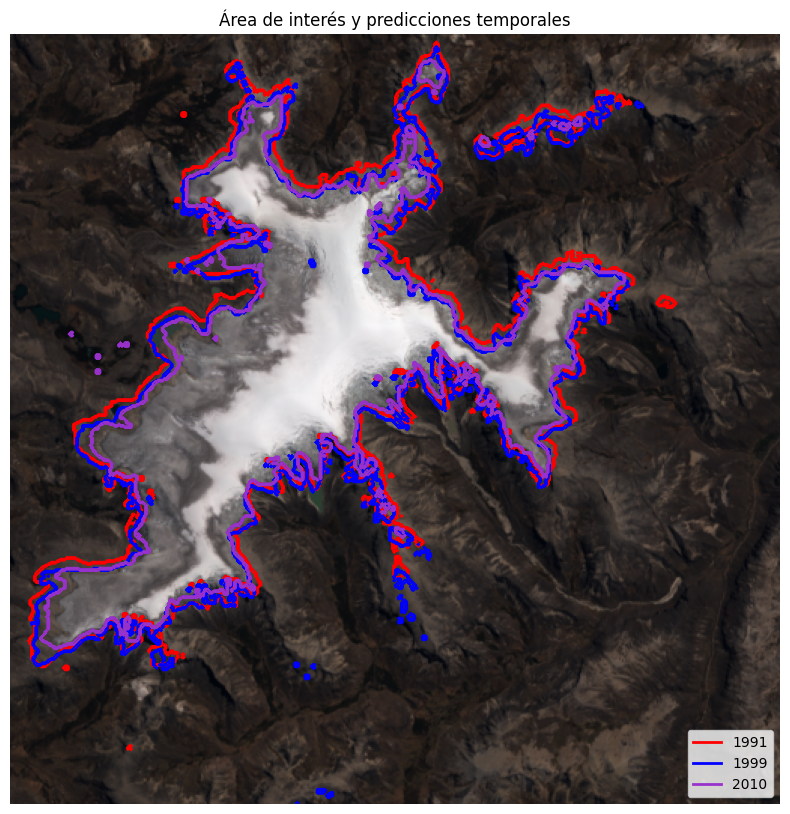

In [54]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
import cv2

#def calcular_area_imagen(imagen_path,resolucion_pixel):


# Función para cargar una imagen multiespectral y devolver la imagen RGB
def cargar_rgb(image_path):
    with rasterio.open(image_path) as src:
        # Seleccionamos las bandas de Red, Green y Blue (depende del orden de tus bandas)
        red = src.read(3)
        green = src.read(2)
        blue = src.read(1)
        
        # Normalizar para escalar los valores entre 0 y 255 (si es necesario)
        rgb = np.stack((red, green, blue), axis=-1)
        rgb = (rgb - np.min(rgb)) / (np.max(rgb) - np.min(rgb)) * 255
        return rgb.astype(np.uint8)

# Función para cargar y detectar bordes en una imagen binaria
def detectar_bordes(image_path):
    with rasterio.open(image_path) as src:
        mask = src.read(1)  # Cargar la imagen binaria (única banda)
        ##################### Calcular area #########################
        pixeles_blancos = (mask == 1).sum()
        # Calcula el área: número de píxeles blancos * área de cada píxel
        area = pixeles_blancos * (30 ** 2)
        #############################################################
        # Detectar bordes utilizando el algoritmo de Canny
        bordes = cv2.Canny((mask * 255).astype(np.uint8), 100, 200)
        return bordes, area


# Cargar la imagen RGB
imagen_rgb = cargar_rgb('/home/cornelius/Documentos/Glaciar_dataset_C2_L1/Analisis_temporal/USGS/Recortar_patchs_L8/Analisis_512x512_image/LC08_L1TP_003070_20240821_20240830_02_T1.TIF')

# Cargar y detectar bordes de las imágenes binarias de predicción
bordes_pred1, area1991 = detectar_bordes('/home/cornelius/Documentos/Glaciar_dataset_C2_L1/Analisis_temporal/USGS/Recortar_patchs_L5/Analisis_512x512_image/reconstructed_512x512_1991_image.TIF')
#bordes_pred2, area1995 = detectar_bordes('/home/cornelius/Documentos/Glaciar_dataset_C2_L1/Analisis_temporal/USGS/Recortar_patchs_L5/Analisis_512x512_image/reconstructed_512x512_1995_image.TIF')
bordes_pred3, area1999 = detectar_bordes('/home/cornelius/Documentos/Glaciar_dataset_C2_L1/Analisis_temporal/USGS/Recortar_patchs_L5/Analisis_512x512_image/reconstructed_512x512_1999_image.TIF')
#bordes_pred4, area2006 = detectar_bordes('/home/cornelius/Documentos/Glaciar_dataset_C2_L1/Analisis_temporal/USGS/Recortar_patchs_L5/Analisis_512x512_image/reconstructed_512x512_2006_image.TIF')
bordes_pred5, area2010 = detectar_bordes('/home/cornelius/Documentos/Glaciar_dataset_C2_L1/Analisis_temporal/USGS/Recortar_patchs_L5/Analisis_512x512_image/reconstructed_512x512_2010_image.TIF')

print("Área desde 2015 hasta 2024: ------> ", area2015, area2020, area2024)

# Dibujar la imagen RGB con los bordes superpuestos
plt.figure(figsize=(10, 10))
plt.imshow(imagen_rgb)

# Superponer los bordes de las predicciones con diferentes colores
linea1 = plt.contour(bordes_pred1, colors='red', linewidths=0.5, label='1991')  # Línea roja para el 2013
#linea2 = plt.contour(bordes_pred2, colors='dodgerblue', linewidths=0.5, label='1995')  # Línea azul para el 2020
linea3 = plt.contour(bordes_pred3, colors='blue', linewidths=0.5, label='1999')  # Línea green para el 2020
#linea4 = plt.contour(bordes_pred4, colors='aqua', linewidths=0.5, label='2006')  # Línea azul para el 2020
linea5 = plt.contour(bordes_pred5, colors='darkorchid', linewidths=0.5, label='2010')  # Línea green para el 2020

# Crear líneas para la leyenda
import matplotlib.lines as mlines
linea_roja = mlines.Line2D([], [], color='red', label='1991', linewidth=2)
#linea_azul = mlines.Line2D([], [], color='dodgerblue', label='1995', linewidth=2)
linea_verde = mlines.Line2D([], [], color='blue', label='1999', linewidth=2)
#linea_deeppink = mlines.Line2D([], [], color='aqua', label='2006', linewidth=2)
linea_aqua = mlines.Line2D([], [], color='darkorchid', label='2010', linewidth=2)


# Agregar la leyenda con líneas de color y etiquetas
#plt.legend(handles=[linea_roja, linea_azul, linea_verde, linea_deeppink, linea_aqua], loc='lower right', frameon=True)
plt.legend(handles=[linea_roja, linea_verde, linea_aqua], loc='lower right', frameon=True)

# Mostrar la imagen con los bordes y la leyenda
plt.title('Área de interés y predicciones temporales')
plt.axis('off')   
# Guardar la imagen
plt.savefig('predicciones_temporales.png', bbox_inches='tight', dpi=300)  # Ajustar bbox para que no se corte nada
plt.show()

Área desde 1991 hasta 2024: ------>  50821200 44450100 35518500


/tmp/ipykernel_23273/2654802983.py:53: UserWarning: The following kwargs were not used by contour: 'label'
  linea1 = plt.contour(bordes_pred1, colors='blue', linewidths=0.5, label='1991')  # Línea roja para el 2013
/tmp/ipykernel_23273/2654802983.py:55: UserWarning: The following kwargs were not used by contour: 'label'
  linea3 = plt.contour(bordes_pred3, colors='red', linewidths=0.5, label='2006')  # Línea green para el 2020
/tmp/ipykernel_23273/2654802983.py:57: UserWarning: The following kwargs were not used by contour: 'label'
  linea5 = plt.contour(bordes_pred5, colors='darkviolet', linewidths=0.5, label='2024')  # Línea green para el 2020


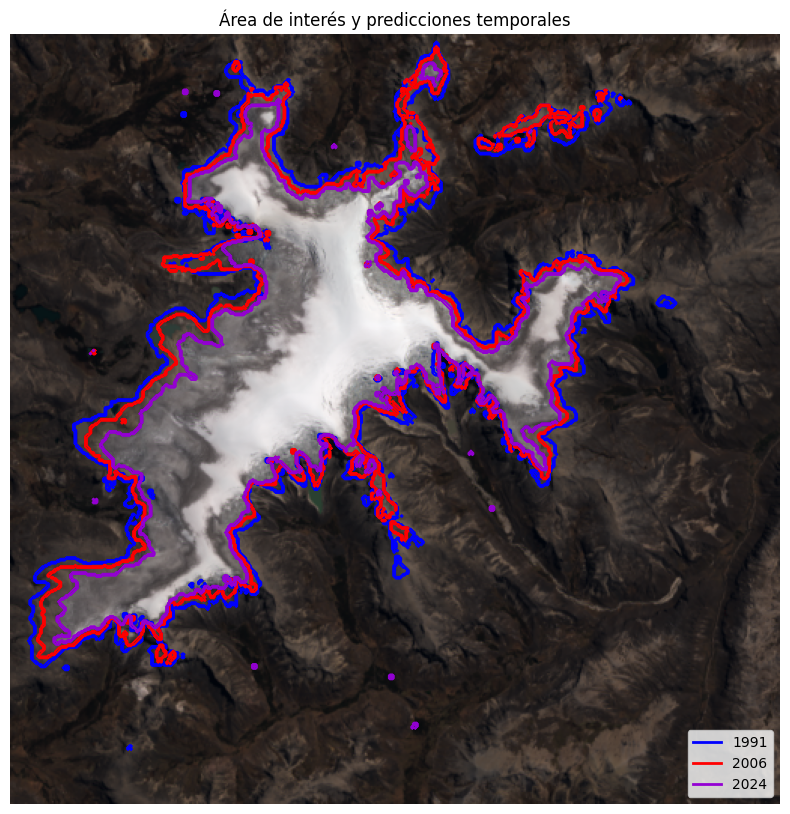

In [53]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
import cv2

#def calcular_area_imagen(imagen_path,resolucion_pixel):


# Función para cargar una imagen multiespectral y devolver la imagen RGB
def cargar_rgb(image_path):
    with rasterio.open(image_path) as src:
        # Seleccionamos las bandas de Red, Green y Blue (depende del orden de tus bandas)
        red = src.read(3)
        green = src.read(2)
        blue = src.read(1)
        
        # Normalizar para escalar los valores entre 0 y 255 (si es necesario)
        rgb = np.stack((red, green, blue), axis=-1)
        rgb = (rgb - np.min(rgb)) / (np.max(rgb) - np.min(rgb)) * 255
        return rgb.astype(np.uint8)

# Función para cargar y detectar bordes en una imagen binaria
def detectar_bordes(image_path):
    with rasterio.open(image_path) as src:
        mask = src.read(1)  # Cargar la imagen binaria (única banda)
        ##################### Calcular area #########################
        pixeles_blancos = (mask == 1).sum()
        # Calcula el área: número de píxeles blancos * área de cada píxel
        area = pixeles_blancos * (30 ** 2)
        #############################################################
        # Detectar bordes utilizando el algoritmo de Canny
        bordes = cv2.Canny((mask * 255).astype(np.uint8), 100, 200)
        return bordes, area


# Cargar la imagen RGB
imagen_rgb = cargar_rgb('/home/cornelius/Documentos/Glaciar_dataset_C2_L1/Analisis_temporal/USGS/Recortar_patchs_L8/Analisis_512x512_image/LC08_L1TP_003070_20240821_20240830_02_T1.TIF')

# Cargar y detectar bordes de las imágenes binarias de predicción
bordes_pred1, area1991 = detectar_bordes('/home/cornelius/Documentos/Glaciar_dataset_C2_L1/Analisis_temporal/USGS/Recortar_patchs_L5/Analisis_512x512_image/reconstructed_512x512_1991_image.TIF')
#bordes_pred2, area1995 = detectar_bordes('/home/cornelius/Documentos/Glaciar_dataset_C2_L1/Analisis_temporal/USGS/Recortar_patchs_L5/Analisis_512x512_image/reconstructed_512x512_1995_image.TIF')
bordes_pred3, area2006 = detectar_bordes('/home/cornelius/Documentos/Glaciar_dataset_C2_L1/Analisis_temporal/USGS/Recortar_patchs_L5/Analisis_512x512_image/reconstructed_512x512_2006_image.TIF')
#bordes_pred4, area2006 = detectar_bordes('/home/cornelius/Documentos/Glaciar_dataset_C2_L1/Analisis_temporal/USGS/Recortar_patchs_L5/Analisis_512x512_image/reconstructed_512x512_2006_image.TIF')
bordes_pred5, area2024 = detectar_bordes('/home/cornelius/Documentos/Glaciar_dataset_C2_L1/Analisis_temporal/USGS/Recortar_patchs_L8/Analisis_512x512_image/reconstructed_512x512_2024_image.TIF')

print("Área desde 1991 hasta 2024: ------> ", area1991, area2006, area2024)

# Dibujar la imagen RGB con los bordes superpuestos
plt.figure(figsize=(10, 10))
plt.imshow(imagen_rgb)

# Superponer los bordes de las predicciones con diferentes colores
linea1 = plt.contour(bordes_pred1, colors='blue', linewidths=0.5, label='1991')  # Línea roja para el 2013
#linea2 = plt.contour(bordes_pred2, colors='dodgerblue', linewidths=0.5, label='1995')  # Línea azul para el 2020
linea3 = plt.contour(bordes_pred3, colors='red', linewidths=0.5, label='2006')  # Línea green para el 2020
#linea4 = plt.contour(bordes_pred4, colors='aqua', linewidths=0.5, label='2006')  # Línea azul para el 2020
linea5 = plt.contour(bordes_pred5, colors='darkviolet', linewidths=0.5, label='2024')  # Línea green para el 2020

# Crear líneas para la leyenda
import matplotlib.lines as mlines
linea_roja = mlines.Line2D([], [], color='blue', label='1991', linewidth=2)
#linea_azul = mlines.Line2D([], [], color='dodgerblue', label='1995', linewidth=2)
linea_verde = mlines.Line2D([], [], color='red', label='2006', linewidth=2)
#linea_deeppink = mlines.Line2D([], [], color='aqua', label='2006', linewidth=2)
linea_aqua = mlines.Line2D([], [], color='darkviolet', label='2024', linewidth=2)


# Agregar la leyenda con líneas de color y etiquetas
#plt.legend(handles=[linea_roja, linea_azul, linea_verde, linea_deeppink, linea_aqua], loc='lower right', frameon=True)
plt.legend(handles=[linea_roja, linea_verde, linea_aqua], loc='lower right', frameon=True)

# Mostrar la imagen con los bordes y la leyenda
plt.title('Área de interés y predicciones temporales')
plt.axis('off')   
# Guardar la imagen
plt.savefig('predicciones_temporales.png', bbox_inches='tight', dpi=300)  # Ajustar bbox para que no se corte nada
plt.show()

Ver Como estan las imagenes

In [62]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
import os

# Ruta de la imagen y carpeta de salida
dir = "/home/cornelius/Documentos/Glaciar_dataset_C2_L1/Analisis_temporal/USGS/Recortar_patchs_L5/Analisis_512x512_correct/reconstructed_512x512_2024_image.TIF"

# Leer las bandas de la imagen
with rasterio.open(dir) as src:
    img = src.read(1)
    print(np.max(img), np.min(img))

1.0 0.0


/home/cornelius/miniconda3/envs/pytorch_watnet/lib/python3.11/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


/home/cornelius/miniconda3/envs/pytorch_watnet/lib/python3.11/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
/tmp/ipykernel_23273/3530347591.py:54: UserWarning: The following kwargs were not used by contour: 'label'
  linea1 = plt.contour(bordes_pred1, colors='blue', linewidths=0.5, label='1991')  # Línea roja para el 2013
/tmp/ipykernel_23273/3530347591.py:56: UserWarning: The following kwargs were not used by contour: 'label'
  linea3 = plt.contour(bordes_pred3, colors='red', linewidths=0.5, label='2006')  # Línea green para el 2020


Área desde 1991 hasta 2024: ------>  50809500 44199000 35496900


/tmp/ipykernel_23273/3530347591.py:58: UserWarning: The following kwargs were not used by contour: 'label'
  linea5 = plt.contour(bordes_pred5, colors='darkviolet', linewidths=0.5, label='2024')  # Línea green para el 2020


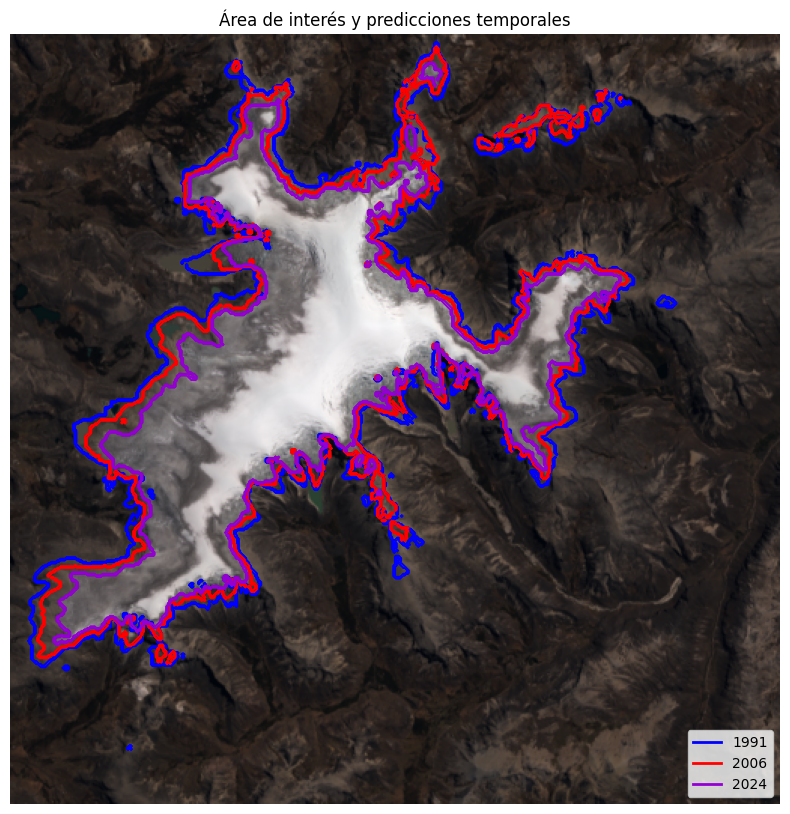

In [61]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
import cv2

#def calcular_area_imagen(imagen_path,resolucion_pixel):


# Función para cargar una imagen multiespectral y devolver la imagen RGB
def cargar_rgb(image_path):
    with rasterio.open(image_path) as src:
        # Seleccionamos las bandas de Red, Green y Blue (depende del orden de tus bandas)
        red = src.read(3)
        green = src.read(2)
        blue = src.read(1)
        
        # Normalizar para escalar los valores entre 0 y 255 (si es necesario)
        rgb = np.stack((red, green, blue), axis=-1)
        rgb = (rgb - np.min(rgb)) / (np.max(rgb) - np.min(rgb)) * 255
        return rgb.astype(np.uint8)

# Función para cargar y detectar bordes en una imagen binaria
def detectar_bordes(image_path):
    with rasterio.open(image_path) as src:
        mask = src.read(1)  # Cargar la imagen binaria (única banda)
        mask = mask/(np.max(mask))
        ##################### Calcular area #########################
        pixeles_blancos = (mask == 1).sum()
        # Calcula el área: número de píxeles blancos * área de cada píxel
        area = pixeles_blancos * (30 ** 2)
        #############################################################
        # Detectar bordes utilizando el algoritmo de Canny
        bordes = cv2.Canny((mask * 255).astype(np.uint8), 100, 200)
        return bordes, area


# Cargar la imagen RGB
imagen_rgb = cargar_rgb('/home/cornelius/Documentos/Glaciar_dataset_C2_L1/Analisis_temporal/USGS/Recortar_patchs_L8/Analisis_512x512_image/LC08_L1TP_003070_20240821_20240830_02_T1.TIF')

# Cargar y detectar bordes de las imágenes binarias de predicción
bordes_pred1, area1991 = detectar_bordes('/home/cornelius/Documentos/Glaciar_dataset_C2_L1/Analisis_temporal/USGS/Recortar_patchs_L5/Analisis_512x512_image/correccion_512x512_TIF/reconstructed_512x512_1991_image.TIF')
#bordes_pred2, area1995 = detectar_bordes('/home/cornelius/Documentos/Glaciar_dataset_C2_L1/Analisis_temporal/USGS/Recortar_patchs_L5/Analisis_512x512_image/reconstructed_512x512_1995_image.TIF')
bordes_pred3, area2006 = detectar_bordes('/home/cornelius/Documentos/Glaciar_dataset_C2_L1/Analisis_temporal/USGS/Recortar_patchs_L5/Analisis_512x512_image/correccion_512x512_TIF/reconstructed_512x512_2006_image.TIF')
#bordes_pred4, area2006 = detectar_bordes('/home/cornelius/Documentos/Glaciar_dataset_C2_L1/Analisis_temporal/USGS/Recortar_patchs_L5/Analisis_512x512_image/reconstructed_512x512_2006_image.TIF')
bordes_pred5, area2024 = detectar_bordes('/home/cornelius/Documentos/Glaciar_dataset_C2_L1/Analisis_temporal/USGS/Recortar_patchs_L5/Analisis_512x512_image/correccion_512x512_TIF/reconstructed_512x512_2024_image.TIF')

print("Área desde 1991 hasta 2024: ------> ", area1991, area2006, area2024)

# Dibujar la imagen RGB con los bordes superpuestos
plt.figure(figsize=(10, 10))
plt.imshow(imagen_rgb)

# Superponer los bordes de las predicciones con diferentes colores
linea1 = plt.contour(bordes_pred1, colors='blue', linewidths=0.5, label='1991')  # Línea roja para el 2013
#linea2 = plt.contour(bordes_pred2, colors='dodgerblue', linewidths=0.5, label='1995')  # Línea azul para el 2020
linea3 = plt.contour(bordes_pred3, colors='red', linewidths=0.5, label='2006')  # Línea green para el 2020
#linea4 = plt.contour(bordes_pred4, colors='aqua', linewidths=0.5, label='2006')  # Línea azul para el 2020
linea5 = plt.contour(bordes_pred5, colors='darkviolet', linewidths=0.5, label='2024')  # Línea green para el 2020

# Crear líneas para la leyenda
import matplotlib.lines as mlines
linea_roja = mlines.Line2D([], [], color='blue', label='1991', linewidth=2)
#linea_azul = mlines.Line2D([], [], color='dodgerblue', label='1995', linewidth=2)
linea_verde = mlines.Line2D([], [], color='red', label='2006', linewidth=2)
#linea_deeppink = mlines.Line2D([], [], color='aqua', label='2006', linewidth=2)
linea_aqua = mlines.Line2D([], [], color='darkviolet', label='2024', linewidth=2)


# Agregar la leyenda con líneas de color y etiquetas
#plt.legend(handles=[linea_roja, linea_azul, linea_verde, linea_deeppink, linea_aqua], loc='lower right', frameon=True)
plt.legend(handles=[linea_roja, linea_verde, linea_aqua], loc='lower right', frameon=True)

# Mostrar la imagen con los bordes y la leyenda
plt.title('Área de interés y predicciones temporales')
plt.axis('off')   
# Guardar la imagen
plt.savefig('predicciones_temporales.png', bbox_inches='tight', dpi=300)  # Ajustar bbox para que no se corte nada
plt.show()

Área desde 1991 hasta 2024: ------>  50813100 44194500 35495100


/tmp/ipykernel_23273/2413953318.py:54: UserWarning: The following kwargs were not used by contour: 'label'
  linea1 = plt.contour(bordes_pred1, colors='blue', linewidths=0.5, label='1991')  # Línea roja para el 2013
/tmp/ipykernel_23273/2413953318.py:56: UserWarning: The following kwargs were not used by contour: 'label'
  linea3 = plt.contour(bordes_pred3, colors='red', linewidths=0.5, label='2006')  # Línea green para el 2020
/tmp/ipykernel_23273/2413953318.py:58: UserWarning: The following kwargs were not used by contour: 'label'
  linea5 = plt.contour(bordes_pred5, colors='darkviolet', linewidths=0.5, label='2024')  # Línea green para el 2020


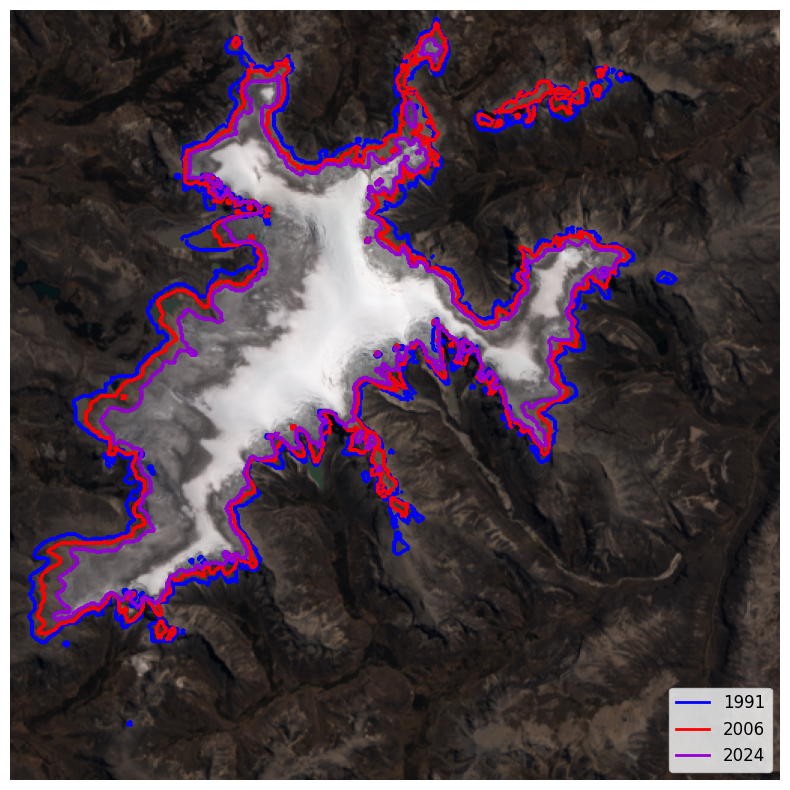

In [73]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
import cv2

#def calcular_area_imagen(imagen_path,resolucion_pixel):


# Función para cargar una imagen multiespectral y devolver la imagen RGB
def cargar_rgb(image_path):
    with rasterio.open(image_path) as src:
        # Seleccionamos las bandas de Red, Green y Blue (depende del orden de tus bandas)
        red = src.read(3)
        green = src.read(2)
        blue = src.read(1)
        
        # Normalizar para escalar los valores entre 0 y 255 (si es necesario)
        rgb = np.stack((red, green, blue), axis=-1)
        rgb = (rgb - np.min(rgb)) / (np.max(rgb) - np.min(rgb)) * 255
        return rgb.astype(np.uint8)

# Función para cargar y detectar bordes en una imagen binaria
def detectar_bordes(image_path):
    with rasterio.open(image_path) as src:
        mask = src.read(1)  # Cargar la imagen binaria (única banda)
        #mask = mask/(np.max(mask))
        ##################### Calcular area #########################
        pixeles_blancos = (mask == 1).sum()
        # Calcula el área: número de píxeles blancos * área de cada píxel
        area = pixeles_blancos * (30 ** 2)
        #############################################################
        # Detectar bordes utilizando el algoritmo de Canny
        bordes = cv2.Canny((mask * 255).astype(np.uint8), 100, 200)
        return bordes, area


# Cargar la imagen RGB
imagen_rgb = cargar_rgb('/home/cornelius/Documentos/Glaciar_dataset_C2_L1/Analisis_temporal/USGS/Recortar_patchs_L8/Analisis_512x512_image/LC08_L1TP_003070_20240821_20240830_02_T1.TIF')

# Cargar y detectar bordes de las imágenes binarias de predicción
bordes_pred1, area1991 = detectar_bordes('/home/cornelius/Documentos/Glaciar_dataset_C2_L1/Analisis_temporal/USGS/Recortar_patchs_L5/Analisis_512x512_correct/reconstructed_512x512_1991_image.TIF')
#bordes_pred2, area1995 = detectar_bordes('/home/cornelius/Documentos/Glaciar_dataset_C2_L1/Analisis_temporal/USGS/Recortar_patchs_L5/Analisis_512x512_image/reconstructed_512x512_1995_image.TIF')
bordes_pred3, area2006 = detectar_bordes('/home/cornelius/Documentos/Glaciar_dataset_C2_L1/Analisis_temporal/USGS/Recortar_patchs_L5/Analisis_512x512_correct/reconstructed_512x512_2006_image.TIF')
#bordes_pred4, area2006 = detectar_bordes('/home/cornelius/Documentos/Glaciar_dataset_C2_L1/Analisis_temporal/USGS/Recortar_patchs_L5/Analisis_512x512_image/reconstructed_512x512_2006_image.TIF')
bordes_pred5, area2024 = detectar_bordes('/home/cornelius/Documentos/Glaciar_dataset_C2_L1/Analisis_temporal/USGS/Recortar_patchs_L5/Analisis_512x512_correct/reconstructed_512x512_2024_image.TIF')

print("Área desde 1991 hasta 2024: ------> ", area1991, area2006, area2024)

# Dibujar la imagen RGB con los bordes superpuestos
plt.figure(figsize=(10, 10))
plt.imshow(imagen_rgb)

# Superponer los bordes de las predicciones con diferentes colores
linea1 = plt.contour(bordes_pred1, colors='blue', linewidths=0.5, label='1991')  # Línea roja para el 2013
#linea2 = plt.contour(bordes_pred2, colors='dodgerblue', linewidths=0.5, label='1995')  # Línea azul para el 2020
linea3 = plt.contour(bordes_pred3, colors='red', linewidths=0.5, label='2006')  # Línea green para el 2020
#linea4 = plt.contour(bordes_pred4, colors='aqua', linewidths=0.5, label='2006')  # Línea azul para el 2020
linea5 = plt.contour(bordes_pred5, colors='darkviolet', linewidths=0.5, label='2024')  # Línea green para el 2020

# Crear líneas para la leyenda
import matplotlib.lines as mlines
linea_azul = mlines.Line2D([], [], color='blue', label='1991', linewidth=2)
#linea_azul = mlines.Line2D([], [], color='dodgerblue', label='1995', linewidth=2)
linea_rojo = mlines.Line2D([], [], color='red', label='2006', linewidth=2)
#linea_deeppink = mlines.Line2D([], [], color='aqua', label='2006', linewidth=2)
linea_violeta = mlines.Line2D([], [], color='darkviolet', label='2024', linewidth=2)

# Agregar la leyenda con tamaño de fuente aumentado
plt.legend(handles=[linea_azul, linea_rojo, linea_violeta], loc='lower right', frameon=True, prop={'size': 12})

# Agregar la leyenda con líneas de color y etiquetas
#plt.legend(handles=[linea_roja, linea_azul, linea_verde, linea_deeppink, linea_aqua], loc='lower right', frameon=True)
#plt.legend(handles=[linea_roja, linea_verde, linea_aqua], loc='lower right', frameon=True)

# Mostrar la imagen con los bordes y la leyenda
#plt.title('Área de interés y predicciones temporales')
plt.axis('off')   
# Guardar la imagen
plt.savefig('predicciones_temporales.png', bbox_inches='tight', dpi=300)  # Ajustar bbox para que no se corte nada
plt.show()

/home/cornelius/miniconda3/envs/pytorch_watnet/lib/python3.11/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


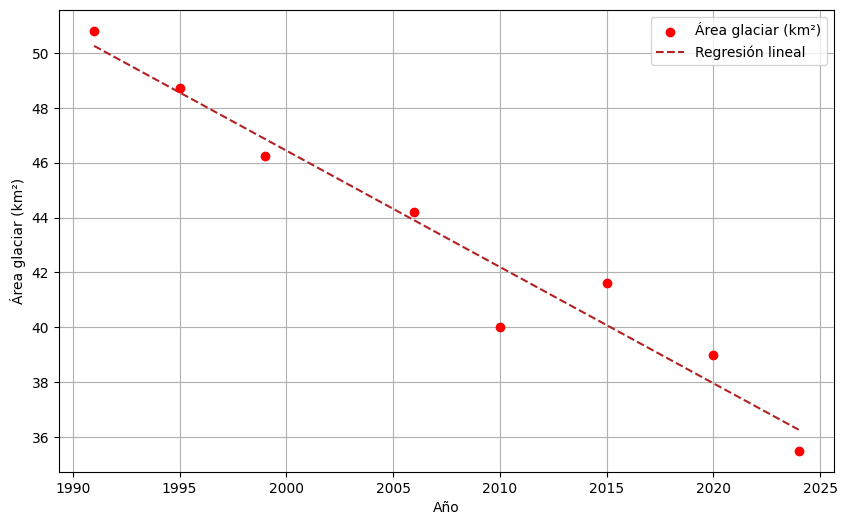

In [82]:
import os
import rasterio
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Ruta de la carpeta que contiene las imágenes binarias
folder_path = '/home/cornelius/Documentos/Glaciar_dataset_C2_L1/Analisis_temporal/USGS/Analisis_512x512_correct/'

# Inicializar listas para almacenar los años y las áreas
years = []
areas_km2 = []

# Recorrer los archivos en la carpeta
for filename in os.listdir(folder_path):
    if filename.endswith('.TIF'):
        # Extraer el año del nombre del archivo (suponiendo que el nombre contiene el año)
        year = int(filename.split('.')[0])  # Asumiendo que el formato es 'AÑO.TIF'
        years.append(year)
        
        # Abrir la imagen binaria
        filepath = os.path.join(folder_path, filename)
        with rasterio.open(filepath) as src:
            # Leer la imagen como un array numpy
            image = src.read(1)
            # Calcular el número de píxeles blancos (donde el valor es 1)
            glacier_pixels = np.sum(image == 1)
            # Cada píxel representa un área de 30x30 metros = 900 m^2
            area_m2 = glacier_pixels * 900  # Área en metros cuadrados
            area_km2 = area_m2 / 1e6  # Convertir a kilómetros cuadrados
            areas_km2.append(area_km2)

# Ordenar los años y áreas en orden cronológico
years, areas_km2 = zip(*sorted(zip(years, areas_km2)))

# Graficar el área vs el año
plt.figure(figsize=(10, 6))
plt.scatter(years, areas_km2, color='red', label='Área glaciar (km²)', zorder=5)

# Realizar la regresión lineal
years_reshape = np.array(years).reshape(-1, 1)  # Necesitamos una matriz 2D para sklearn
regression = LinearRegression()
regression.fit(years_reshape, areas_km2)
predicted_areas = regression.predict(years_reshape)

# Graficar la línea de regresión
plt.plot(years, predicted_areas, color='firebrick', linestyle='--', label='Regresión lineal')

# Etiquetas y título
plt.xlabel('Año')
plt.ylabel('Área glaciar (km²)')
#plt.title('Área Glaciar vs Año')
plt.legend()
plt.grid(True)
plt.savefig('AreaVSaño.png', bbox_inches='tight', dpi=300)  # Ajustar bbox para que no se corte nada
# Mostrar la gráfica
plt.show()


/home/cornelius/miniconda3/envs/pytorch_watnet/lib/python3.11/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


Intercepto (b_0): 894.8970914486919
Pendiente (b_1): -0.42422776659959743
MSE: 1.199088376705236
RMSE: 1.095028938752413
R^2: 0.9491054719053748


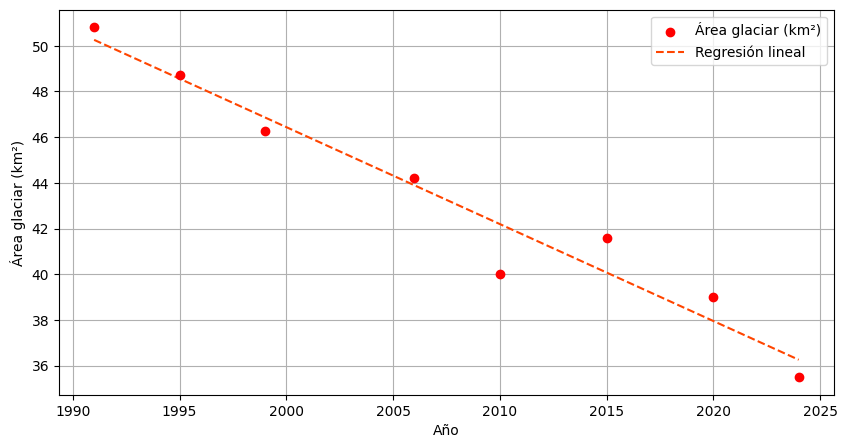

In [81]:
import os
import rasterio
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Ruta de la carpeta que contiene las imágenes binarias
folder_path = '/home/cornelius/Documentos/Glaciar_dataset_C2_L1/Analisis_temporal/USGS/Analisis_512x512_correct/'

# Inicializar listas para almacenar los años y las áreas
years = []
areas_km2 = []

# Recorrer los archivos en la carpeta
for filename in os.listdir(folder_path):
    if filename.endswith('.TIF'):
        # Extraer el año del nombre del archivo
        year = int(filename.split('.')[0])  # Asumiendo que el formato es 'AÑO.TIF'
        years.append(year)
        
        # Abrir la imagen binaria
        filepath = os.path.join(folder_path, filename)
        with rasterio.open(filepath) as src:
            # Leer la imagen como un array numpy
            image = src.read(1)
            # Calcular el número de píxeles blancos (donde el valor es 1)
            glacier_pixels = np.sum(image == 1)
            # Cada píxel representa un área de 30x30 metros = 900 m^2
            area_m2 = glacier_pixels * 900  # Área en metros cuadrados
            area_km2 = area_m2 / 1e6  # Convertir a kilómetros cuadrados
            areas_km2.append(area_km2)

# Ordenar los años y áreas en orden cronológico
years, areas_km2 = zip(*sorted(zip(years, areas_km2)))

# Convertir años y áreas a arrays de numpy
years_reshape = np.array(years).reshape(-1, 1)
areas_km2 = np.array(areas_km2)

# Realizar la regresión lineal
regression = LinearRegression()
regression.fit(years_reshape, areas_km2)

# Obtener predicciones
predicted_areas = regression.predict(years_reshape)

# Calcular coeficientes
intercept = regression.intercept_
slope = regression.coef_[0]

# Calcular error (MSE, RMSE) y confiabilidad (R^2)
mse = mean_squared_error(areas_km2, predicted_areas)
rmse = np.sqrt(mse)
r2 = r2_score(areas_km2, predicted_areas)

# Imprimir los resultados
print(f"Intercepto (b_0): {intercept}")
print(f"Pendiente (b_1): {slope}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R^2: {r2}")

# Graficar el área vs el año y la línea de regresión
plt.figure(figsize=(10, 5))
plt.scatter(years, areas_km2, color='red', label='Área glaciar (km²)', zorder=5)
plt.plot(years, predicted_areas, color='orangered', linestyle='--', label='Regresión lineal')

# Etiquetas y título
plt.xlabel('Año')
plt.ylabel('Área glaciar (km²)')
#plt.title(f'Área Glaciar vs Año (R²={r2:.2f})')
plt.legend()
plt.grid(True)

# Mostrar la gráfica
plt.show()


/home/cornelius/miniconda3/envs/pytorch_watnet/lib/python3.11/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


Intercepto (b_0): 833.3502390793024
Pendiente (b_1): -0.3935826721812624
MSE: 1.2304676318013434
RMSE: 1.109264455304209
R^2: 0.9297468583348292


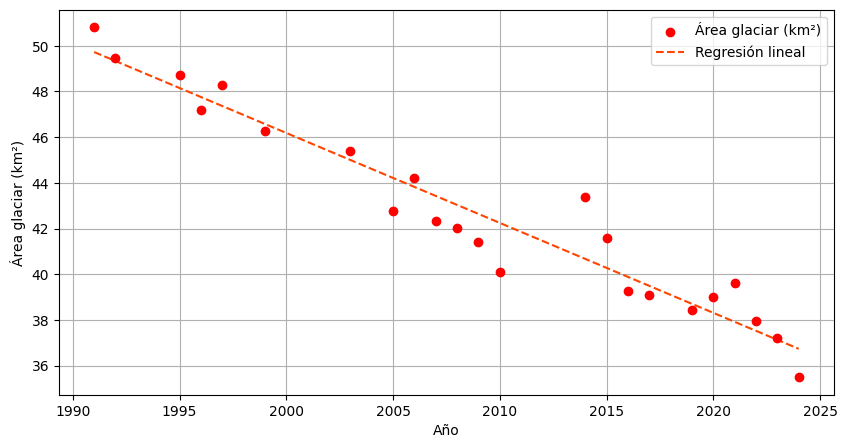

In [2]:
import os
import rasterio
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Ruta de la carpeta que contiene las imágenes binarias
folder_path = '/home/cornelius/Documentos/Pyqt_quelccaya/Quelccaya_512x512_new/'

# Inicializar listas para almacenar los años y las áreas
years = []
areas_km2 = []

# Recorrer los archivos en la carpeta
for filename in os.listdir(folder_path):
    if filename.endswith('.TIF'):
        # Extraer el año del nombre del archivo
        year = int(filename.split('.')[0])  # Asumiendo que el formato es 'AÑO.TIF'
        years.append(year)
        
        # Abrir la imagen binaria
        filepath = os.path.join(folder_path, filename)
        with rasterio.open(filepath) as src:
            # Leer la imagen como un array numpy
            image = src.read(1)
            # Calcular el número de píxeles blancos (donde el valor es 1)
            glacier_pixels = np.sum(image == 1)
            # Cada píxel representa un área de 30x30 metros = 900 m^2
            area_m2 = glacier_pixels * 900  # Área en metros cuadrados
            area_km2 = area_m2 / 1e6  # Convertir a kilómetros cuadrados
            areas_km2.append(area_km2)

# Ordenar los años y áreas en orden cronológico
years, areas_km2 = zip(*sorted(zip(years, areas_km2)))

# Convertir años y áreas a arrays de numpy
years_reshape = np.array(years).reshape(-1, 1)
areas_km2 = np.array(areas_km2)
#print(years_reshape)
#print("############################")
#print(areas_km2)

# Realizar la regresión lineal
regression = LinearRegression()
regression.fit(years_reshape, areas_km2)

# Obtener predicciones
predicted_areas = regression.predict(years_reshape)

# Calcular coeficientes
intercept = regression.intercept_
slope = regression.coef_[0]

# Calcular error (MSE, RMSE) y confiabilidad (R^2)
mse = mean_squared_error(areas_km2, predicted_areas)
rmse = np.sqrt(mse)
r2 = r2_score(areas_km2, predicted_areas)

# Imprimir los resultados
print(f"Intercepto (b_0): {intercept}")
print(f"Pendiente (b_1): {slope}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R^2: {r2}")

# Graficar el área vs el año y la línea de regresión
plt.figure(figsize=(10, 5))
plt.scatter(years, areas_km2, color='red', label='Área glaciar (km²)', zorder=5)
plt.plot(years, predicted_areas, color='orangered', linestyle='--', label='Regresión lineal')

# Etiquetas y título
plt.xlabel('Año')
plt.ylabel('Área glaciar (km²)')
#plt.title(f'Área Glaciar vs Año (R²={r2:.2f})')
plt.legend()
plt.grid(True)
plt.savefig('yearVSarea1.png', bbox_inches='tight', dpi=300)
# Mostrar la gráfica
plt.show()

/home/cornelius/miniconda3/envs/pytorch_watnet/lib/python3.11/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


[50.8131 49.4514 48.7134 47.2077 48.2877 46.2609 45.4023 42.7689 44.1945
 42.3459 42.0192 41.4171 40.0995 43.3746 41.5998 39.2517 39.0825 38.421
 38.9988 39.6297 37.9539 37.2051 35.4951]
Intercepto (b_0): 833.3502390793024
Pendiente (b_1): -0.3935826721812624
MSE: 1.2304676318013434
RMSE: 1.109264455304209
R^2: 0.9297468583348292


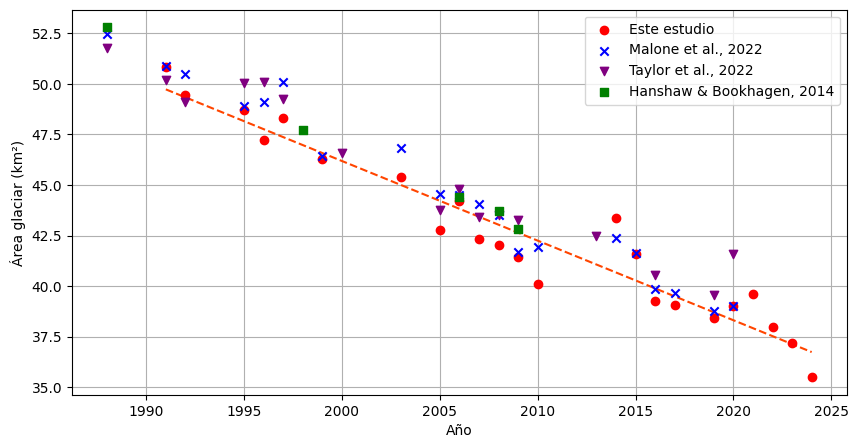

In [15]:
import os
import rasterio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Ruta de la carpeta que contiene las imágenes binarias del estudio A
folder_path = '/home/cornelius/Documentos/Pyqt_quelccaya/Quelccaya_512x512_new/'

# Inicializar listas para almacenar los años y las áreas para el estudio A
years_A = []
areas_km2_A = []

# Recorrer los archivos en la carpeta para el estudio A
for filename in os.listdir(folder_path):
    if filename.endswith('.TIF'):
        year = int(filename.split('.')[0])  # Asumiendo que el formato es 'AÑO.TIF'
        years_A.append(year)
        
        filepath = os.path.join(folder_path, filename)
        with rasterio.open(filepath) as src:
            image = src.read(1)
            glacier_pixels = np.sum(image == 1)
            area_m2 = glacier_pixels * 900
            area_km2 = area_m2 / 1e6
            areas_km2_A.append(area_km2)

# Ordenar los años y áreas en orden cronológico para el estudio A
years_A, areas_km2_A = zip(*sorted(zip(years_A, areas_km2_A)))

# Convertir años y áreas del estudio A a arrays de numpy
years_A_reshape = np.array(years_A).reshape(-1, 1)
areas_km2_A = np.array(areas_km2_A)

# Cargar los datos del estudio B desde un archivo .csv
# Supongamos que el archivo se llama "estudio_B.csv" y tiene columnas "Year" y "Glacier Area"

df_B = pd.read_csv('/home/cornelius/Escritorio/Taylor_Quelccaya.csv', quotechar='"').dropna()
years_B = df_B['Year'].values
areas_km2_B = df_B['Glacier Area'].values
print(areas_km2_A)

df_C = pd.read_csv('/home/cornelius/Escritorio/Hanshaw_Quelccaya.csv').dropna()
years_C = df_C['Year'].values
areas_km2_C = df_C['Glacier Area'].values

df_D = pd.read_csv('/home/cornelius/Escritorio/malone.csv').dropna()
years_D = df_D['Year'].values
areas_km2_D = df_D['Glacier Area'].values

# Realizar la regresión lineal para el estudio A
regression = LinearRegression()
regression.fit(years_A_reshape, areas_km2_A)
predicted_areas_A = regression.predict(years_A_reshape)

# Calcular coeficientes y métricas para el estudio A
intercept = regression.intercept_
slope = regression.coef_[0]
mse = mean_squared_error(areas_km2_A, predicted_areas_A)
rmse = np.sqrt(mse)
r2 = r2_score(areas_km2_A, predicted_areas_A)

# Imprimir los resultados del estudio A
print(f"Intercepto (b_0): {intercept}")
print(f"Pendiente (b_1): {slope}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R^2: {r2}")

# Graficar el área glaciar vs el año para ambos estudios
plt.figure(figsize=(10, 5))

# Graficar datos del estudio A
plt.scatter(years_A, areas_km2_A, color='red', label='Este estudio', zorder=5)
#plt.plot(years_A, predicted_areas_A, color='orangered', linestyle='--', label='Regresión lineal A')
plt.plot(years_A, predicted_areas_A, color='orangered', linestyle='--')
# Graficar datos del estudio B
plt.scatter(years_D, areas_km2_D, color='blue', label='Malone et al., 2022', marker='x', zorder=5)
# Graficar datos del estudio B
plt.scatter(years_B, areas_km2_B, color='purple', label='Taylor et al., 2022', marker='v', zorder=5)

# Graficar datos del estudio C
plt.scatter(years_C, areas_km2_C, color='green', label='Hanshaw & Bookhagen, 2014', marker='s', zorder=5)

# Etiquetas y título
plt.xlabel('Año')
plt.ylabel('Área glaciar (km²)')
plt.legend()
plt.grid(True)
plt.savefig('yearVSarea.png', bbox_inches='tight', dpi=300)

# Mostrar la gráfica
plt.show()


/home/cornelius/miniconda3/envs/pytorch_watnet/lib/python3.11/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


[50.8131 49.4514 48.7134 47.2077 48.2877 46.2609 44.1945 42.3459 42.0192
 41.4171 40.0995 43.3746 41.5998 39.2517 38.421  38.9988 39.6297 37.9539
 37.2051 35.4951]
Intercepto (b_0): 833.7758496132454
Pendiente (b_1): -0.3937581348861464
MSE: 1.2884554276107296
RMSE: 1.1351015054217528
R^2: 0.9326403022370836


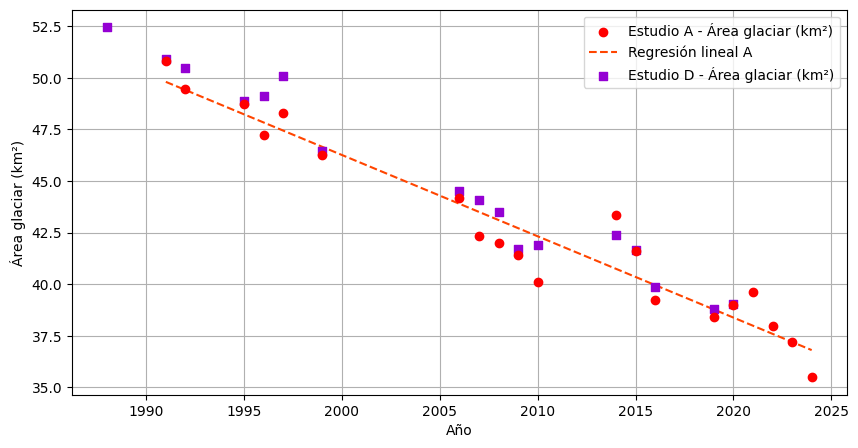

In [21]:
import os
import rasterio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Ruta de la carpeta que contiene las imágenes binarias del estudio A
folder_path = '/home/cornelius/Documentos/Pyqt_quelccaya/Quelccaya_512x512_new/'

# Inicializar listas para almacenar los años y las áreas para el estudio A
years_A = []
areas_km2_A = []

# Recorrer los archivos en la carpeta para el estudio A
for filename in os.listdir(folder_path):
    if filename.endswith('.TIF'):
        year = int(filename.split('.')[0])  # Asumiendo que el formato es 'AÑO.TIF'
        years_A.append(year)
        
        filepath = os.path.join(folder_path, filename)
        with rasterio.open(filepath) as src:
            image = src.read(1)
            glacier_pixels = np.sum(image == 1)
            area_m2 = glacier_pixels * 900
            area_km2 = area_m2 / 1e6
            areas_km2_A.append(area_km2)

# Ordenar los años y áreas en orden cronológico para el estudio A
years_A, areas_km2_A = zip(*sorted(zip(years_A, areas_km2_A)))

# Convertir años y áreas del estudio A a arrays de numpy
years_A_reshape = np.array(years_A).reshape(-1, 1)
areas_km2_A = np.array(areas_km2_A)
print(areas_km2_A)

# Cargar los datos del estudio B desde un archivo .csv
# Supongamos que el archivo se llama "estudio_B.csv" y tiene columnas "Year" y "Glacier Area"
df_B = pd.read_csv('/home/cornelius/Escritorio/Quelccaya_B22.csv')
years_B = df_B['Year'].values
areas_km2_B = df_B['Glacier Area'].values

df_C = pd.read_csv('/home/cornelius/Escritorio/Quelccaya_C.csv')
years_C = df_C['Year'].values
areas_km2_C = df_C['Glacier Area'].values

df_D = pd.read_csv('/home/cornelius/Escritorio/Quelccaya_D.csv')
years_D = df_D['Year'].values
areas_km2_D = df_D['Glacier Area'].values

# Realizar la regresión lineal para el estudio A
regression = LinearRegression()
regression.fit(years_A_reshape, areas_km2_A)
predicted_areas_A = regression.predict(years_A_reshape)

# Calcular coeficientes y métricas para el estudio A
intercept = regression.intercept_
slope = regression.coef_[0]
mse = mean_squared_error(areas_km2_A, predicted_areas_A)
rmse = np.sqrt(mse)
r2 = r2_score(areas_km2_A, predicted_areas_A)

# Imprimir los resultados del estudio A
print(f"Intercepto (b_0): {intercept}")
print(f"Pendiente (b_1): {slope}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R^2: {r2}")

# Graficar el área glaciar vs el año para ambos estudios
plt.figure(figsize=(10, 5))

# Graficar datos del estudio A
plt.scatter(years_A, areas_km2_A, color='red', label='Estudio A - Área glaciar (km²)', zorder=5)
plt.plot(years_A, predicted_areas_A, color='orangered', linestyle='--', label='Regresión lineal A')

# Graficar datos del estudio B
#plt.scatter(years_B, areas_km2_B, color='blue', label='Estudio B - Área glaciar (km²)', marker='x', zorder=5)

# Graficar datos del estudio B
#plt.scatter(years_C, areas_km2_C, color='green', label='Estudio C - Área glaciar (km²)', marker='v', zorder=5)

# Graficar datos del estudio B
plt.scatter(years_D, areas_km2_D, color='darkviolet', label='Estudio D - Área glaciar (km²)', marker='s', zorder=3)

# Etiquetas y título
plt.xlabel('Año')
plt.ylabel('Área glaciar (km²)')
plt.legend()
plt.grid(True)

# Mostrar la gráfica
plt.show()